## Part1 (nQueens)

### Set up

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import re
import datetime as dt
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import seaborn as sns

In [4]:
def ht(df, n = 5):
    print(df.shape)
    if len(df) <= 2*n:
        display(df)
    else:
        display(df.head(n).append(df.tail(n)))

In [5]:
pd.set_option('display.max_columns', 100)
def pf(df):
    pd.set_option('display.max_rows', len(df))
    display(df)
    pd.reset_option('display.max_rows')

In [6]:
plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = [16, 9]

In [7]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [8]:
random_seed = hash('jcha64') % (2 ** 32)

In [9]:
random_seed_list = [199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed]

In [10]:
def RHC_HP(restarts, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed]):
    best_fitness_list = []
    wall_clock_time_list = []    
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(
            problem, 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            restarts=eval(restarts), 
            init_state=init_state, 
            curve=True, 
            random_state=random_seed_list[i]
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'restarts={restarts}, max_attempts={max_attempts}'
        df['RO'] = 'RHC'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

def SA_HP(init_temp, exp_const, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed]):
    best_fitness_list = []
    wall_clock_time_list = []    
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(
            problem, 
            schedule = mlrose.ExpDecay(init_temp = eval(init_temp), exp_const=eval(exp_const), min_temp=1e-10),
            max_attempts = eval(max_attempts), 
            max_iters = 5000,
            init_state = init_state, 
            random_state = random_seed_list[i], 
            curve = True
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'T={init_temp},r={exp_const},max_attempts={max_attempts}'
        df['RO'] = 'SA'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

def GA_HP(pop_size, mut_prob, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed]):
    best_fitness_list = []
    wall_clock_time_list = []
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.genetic_alg(
            problem, 
            pop_size = eval(pop_size),
            mutation_prob=eval(mut_prob), 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            random_state = random_seed_list[i], 
            curve = True
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'pop_size={pop_size},mut_prob={mut_prob},max_attempts={max_attempts}'
        df['RO'] = 'GA'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list        

def MIMIC_HP(pop_size, keep_pct, max_attempts, N, random_seed_list=[199, 197, 193, 191, 181, 179, 173, 167, 163, random_seed], fast_mimic=True):
    best_fitness_list = []
    wall_clock_time_list = []
    for i in range(len(random_seed_list)):
        start = time.time()
        best_state, best_fitness, fitness_curve = mlrose.mimic(
            problem, 
            pop_size=eval(pop_size), 
            keep_pct=eval(keep_pct), 
            max_attempts=eval(max_attempts), 
            max_iters=5000, 
            curve=True, 
            random_state=random_seed_list[i], 
            fast_mimic=fast_mimic
        )
        end = time.time()
        df = DataFrame(fitness_curve)
        df['iter'] = range(len(df))
        df['try'] = i
        df['hyper'] = f'pop_size={pop_size},keep_pct={keep_pct},max_attempts={max_attempts}'
        df['RO'] = 'MIMIC'
        df['N'] = N
        df.columns = ['fitness', 'iter', 'try', 'hyper', 'RO', 'N']
        df_fitness_curve_list.append(df)
        best_fitness_list.append(best_fitness)
        wall_clock_time_list.append(end-start)
    return best_fitness_list, wall_clock_time_list

### nQueens

#### Problem definition

In [11]:
N = 32

In [12]:
fitness = mlrose.Queens()

In [13]:
problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = False, max_val = N)

In [14]:
np.random.seed(random_seed_list[-1])
init_state = np.random.permutation(N)

In [15]:
fitness.evaluate(init_state)

25

#### RHC

In [16]:
df_fitness_curve_list = []

In [17]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

21.5
0.016643571853637695


In [18]:
best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='100', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

7.1
0.26747584342956543


In [19]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(4181, 6)


,fitness,iter,try,hyper,RO,N
0,-25.0,0,0,"restarts=0, max_attempts=10",RHC,32
1,-25.0,1,0,"restarts=0, max_attempts=10",RHC,32
2,-25.0,2,0,"restarts=0, max_attempts=10",RHC,32
3,-25.0,3,0,"restarts=0, max_attempts=10",RHC,32
4,-24.0,4,0,"restarts=0, max_attempts=10",RHC,32
363,-6.0,363,9,"restarts=0, max_attempts=100",RHC,32
364,-6.0,364,9,"restarts=0, max_attempts=100",RHC,32
365,-6.0,365,9,"restarts=0, max_attempts=100",RHC,32
366,-6.0,366,9,"restarts=0, max_attempts=100",RHC,32
367,-6.0,367,9,"restarts=0, max_attempts=100",RHC,32


Text(0.5, 1.0, 'nQueens RHC HP tuning')

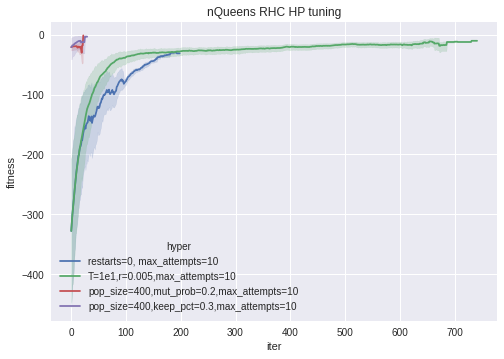

In [51]:
sns.lineplot(data=df_fitness_curve.reset_index(), x="iter", y="fitness", hue="hyper").set_title('nQueens RHC HP tuning')

#### SA

In [21]:
df_fitness_curve_list = []

In [22]:
# T=1e1,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

14.1
0.6043378829956054


In [23]:
# T=1e2,r=0.005,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e2', exp_const='0.005', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

13.9
1.227966547012329


In [24]:
# T=1e2,r=0.05,max_attempts=10
best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e2', exp_const='0.05', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

14.3
0.17497501373291016


In [25]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(17923, 6)


,fitness,iter,try,hyper,RO,N
0,-25.0,0,0,"T=1e1,r=0.005,max_attempts=10",SA,32
1,-26.0,1,0,"T=1e1,r=0.005,max_attempts=10",SA,32
2,-25.0,2,0,"T=1e1,r=0.005,max_attempts=10",SA,32
3,-29.0,3,0,"T=1e1,r=0.005,max_attempts=10",SA,32
4,-29.0,4,0,"T=1e1,r=0.005,max_attempts=10",SA,32
143,-10.0,143,9,"T=1e2,r=0.05,max_attempts=10",SA,32
144,-10.0,144,9,"T=1e2,r=0.05,max_attempts=10",SA,32
145,-10.0,145,9,"T=1e2,r=0.05,max_attempts=10",SA,32
146,-10.0,146,9,"T=1e2,r=0.05,max_attempts=10",SA,32
147,-10.0,147,9,"T=1e2,r=0.05,max_attempts=10",SA,32


Text(0.5, 1.0, 'nQueens SA HP tuning')

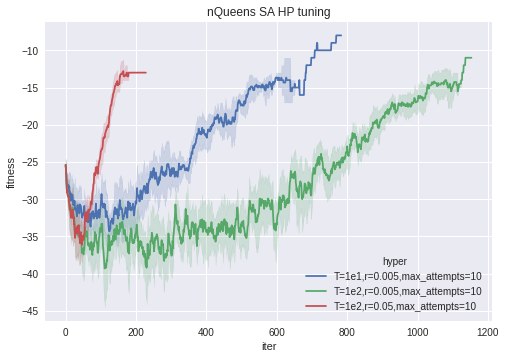

In [26]:
sns.lineplot(data=df_fitness_curve.reset_index(), x="iter", y="fitness", hue="hyper").set_title('nQueens SA HP tuning')

#### MIMIC

In [27]:
df_fitness_curve_list = []

In [28]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.2', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

11.0
8.238096714019775


In [29]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

8.0
10.391769409179688


In [30]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='200', keep_pct='0.4', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

21.0
5.032294988632202


In [31]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='100', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

19.0
3.873958110809326


In [32]:
best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='400', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[random_seed])
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

6.0
19.857009410858154


In [33]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(101, 6)


,fitness,iter,try,hyper,RO,N
0,-18.0,0,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,32
1,-18.0,1,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,32
2,-18.0,2,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,32
3,-16.0,3,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,32
4,-15.0,4,0,"pop_size=200,keep_pct=0.2,max_attempts=10",MIMIC,32
24,-6.0,24,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,32
25,-6.0,25,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,32
26,-6.0,26,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,32
27,-6.0,27,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,32
28,-6.0,28,0,"pop_size=400,keep_pct=0.3,max_attempts=10",MIMIC,32


Text(0.5, 1.0, 'nQueens MIMIC HP tuning')

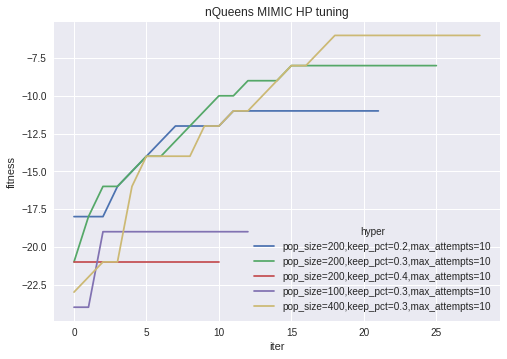

In [34]:
sns.lineplot(data=df_fitness_curve.reset_index(), x="iter", y="fitness", hue="hyper").set_title('nQueens MIMIC HP tuning')

#### GA

In [35]:
df_fitness_curve_list = []

In [36]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='200', mut_prob='0.1', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

19.4
2.38955397605896


In [37]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.1', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

19.4
5.0167804479599


In [38]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.2', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

19.4
4.729671955108643


In [39]:
best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.3', max_attempts='10', N=N)
best_fitness = sum(best_fitness_list) / len(best_fitness_list)
print(best_fitness)
wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
print(wall_clock_time)

18.7
6.161280012130737


In [40]:
df_fitness_curve = pd.concat(df_fitness_curve_list)
ht(df_fitness_curve)

(639, 6)


,fitness,iter,try,hyper,RO,N
0,-24.0,0,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
1,-24.0,1,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
2,-23.0,2,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
3,-23.0,3,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
4,-23.0,4,0,"pop_size=200,mut_prob=0.1,max_attempts=10",GA,32
8,-20.0,8,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,32
9,-20.0,9,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,32
10,-20.0,10,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,32
11,-20.0,11,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,32
12,-20.0,12,9,"pop_size=400,mut_prob=0.3,max_attempts=10",GA,32


Text(0.5, 1.0, 'nQueens GA HP tuning')

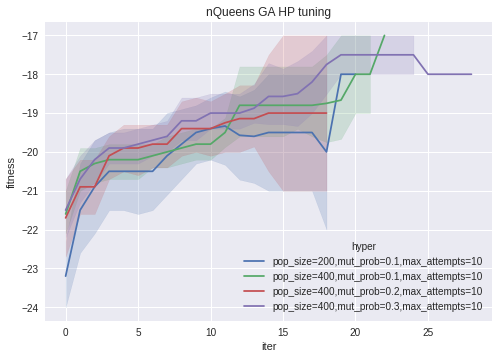

In [41]:
sns.lineplot(data=df_fitness_curve.reset_index(), x="iter", y="fitness", hue="hyper").set_title('nQueens GA HP tuning')

#### Problem Size

In [42]:
df_fitness_curve_list = []
df_result_list = []

In [43]:
fitness = mlrose.Queens()

In [44]:
for N in [8, 16, 32, 64]:
    print('N', N)
    np.random.seed(random_seed_list[-1])
    init_state = np.random.randint(low = 0, high = 2, size = N)
    problem = mlrose.DiscreteOpt(length = N, fitness_fn = fitness, maximize = False, max_val = N)
    
    print('RHC')
    best_fitness_list, wall_clock_time_list = RHC_HP(restarts='0', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)    
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'RHC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='RHC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('SA')
    best_fitness_list, wall_clock_time_list = SA_HP(init_temp='1e1', exp_const='0.005', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'SA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='SA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('GA')
    best_fitness_list, wall_clock_time_list = GA_HP(pop_size='400', mut_prob='0.2', max_attempts='10', N=N)
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'GA', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='GA')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))
    
    print('MIMIC')
    best_fitness_list, wall_clock_time_list = MIMIC_HP(pop_size='400', keep_pct='0.3', max_attempts='10', N=N, random_seed_list=[157])
    best_fitness = sum(best_fitness_list) / len(best_fitness_list)
    print(best_fitness)
    wall_clock_time = sum(wall_clock_time_list) / len(wall_clock_time_list)
    print(wall_clock_time)
    df_fitness_curve = pd.concat(df_fitness_curve_list)
    df_result_list.append(DataFrame({'RO': 'MIMIC', 'N': N, 'best_fitness': best_fitness, 'wall_clock_time': wall_clock_time, 'max_iter': df_fitness_curve[(df_fitness_curve['RO']=='MIMIC')&(df_fitness_curve['N']==N)].groupby('try')['iter'].max().mean()}, index=['N']))

N 8
RHC
3.4
0.0019748926162719725
SA
2.2
0.05497763156890869
GA
1.7
0.7624570846557617
MIMIC
0.0
0.5038692951202393
N 16
RHC
8.3
0.009753108024597168
SA
5.6
0.17022416591644288
GA
6.6
1.6941210746765136
MIMIC
2.0
3.6379940509796143
N 32
RHC
20.3
0.06649148464202881
SA
12.5
0.6577707767486572
GA
19.4
4.723586535453796
MIMIC
4.0
20.811848878860474
N 64
RHC
42.4
0.5568158626556396
SA
32.0
2.5280457019805906
GA
47.7
18.055668115615845
MIMIC
31.0
154.437002658844


Text(0.5, 1.0, 'nQueens 4 ROs N=800')

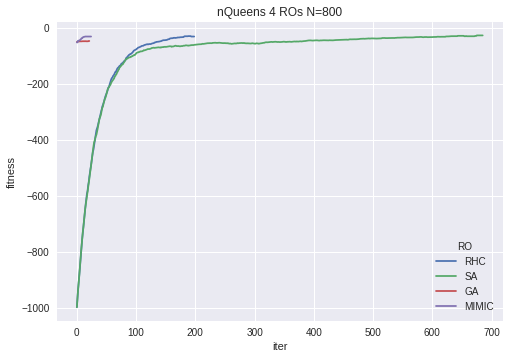

In [45]:
sns.lineplot(data=df_fitness_curve[df_fitness_curve['N']==64].reset_index(), x="iter", y="fitness", hue="RO", ci=None).set_title('nQueens 4 ROs N=800')

In [46]:
df_result = pd.concat(df_result_list)
df_result['best_fitness'] = 1 / df_result['best_fitness']

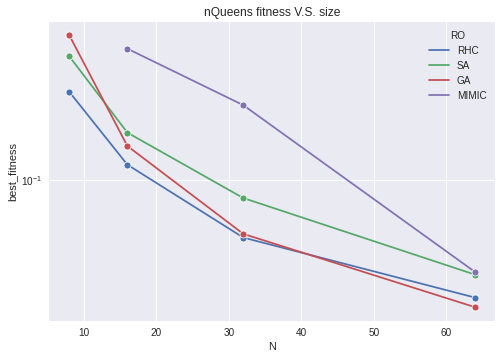

In [47]:
ax = sns.lineplot(data=df_result.reset_index(), x="N", y="best_fitness", hue="RO", marker='o')
ax.set(yscale='log')
ax.set_title('nQueens fitness V.S. size')
plt.show();

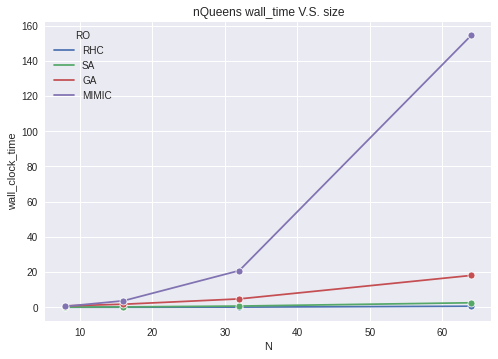

In [48]:
ax = sns.lineplot(data=df_result.reset_index(), x="N", y="wall_clock_time", hue="RO", marker='o')
# ax.set(yscale='log')
ax.set_title('nQueens wall_time V.S. size')
plt.show();

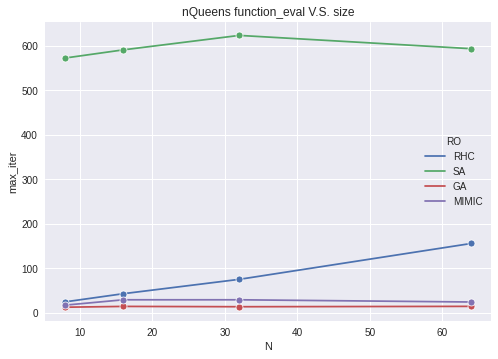

In [49]:
ax = sns.lineplot(data=df_result.reset_index(), x="N", y="max_iter", hue="RO", marker='o')
# ax.set(yscale='log')
ax.set_title('nQueens function_eval V.S. size')
plt.show();